# Import libraries

In [2]:
# Import necessary libraries for data processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Load Datasets

In [4]:
# Load the datasets
train = pd.read_csv('train.csv', dtype={'StateHoliday': str})
store = pd.read_csv('store.csv')
test = pd.read_csv('test.csv', dtype={'StateHoliday': str})

# Display the first few rows of each dataset to check correct
print("Train Data:")
display(train.head())

print("Store Data:")
display(store.head())

print("Test Data:")
display(test.head())

Train Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Store Data:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Test Data:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


# Check Missing Values

In [6]:
# Check missing values in train dataset after merge later
print("Missing values in Train Data:")
print(train.isnull().sum().sort_values(ascending=False))

print("\nMissing values in Store Data:")
print(store.isnull().sum().sort_values(ascending=False))

print("\nMissing values in Test Data:")
print(test.isnull().sum().sort_values(ascending=False))

Missing values in Train Data:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Missing values in Store Data:
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

Missing values in Test Data:
Open             11
Id                0
Store             0
DayOfWeek         0
Date              0
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [7]:
# Get stores that are running promo2 and have promo2 related missing values
promo2_missing_specific = store[
    (store['Promo2'] == 1) &
    (
        store['Promo2SinceWeek'].isna() |
        store['Promo2SinceYear'].isna() |
        store['PromoInterval'].isna()
    )
]

# Show first 10 results
promo2_missing_specific.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


# Cleaning Missing Values

In [9]:
# Cleaning missing values in store data

# Fill missing CompetitionDistance with max value to keep unknown ones far from stores
store.loc[:, 'CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].max())

# Fill missing CompetitionOpenSinceMonth and CompetitionOpenSinceYear with their respective mode
comp_month_mode = store['CompetitionOpenSinceMonth'].mode()[0]
comp_year_mode = store['CompetitionOpenSinceYear'].mode()[0]
store.loc[:, 'CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(comp_month_mode)
store.loc[:, 'CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(comp_year_mode)

# Fill missing Promo2SinceWeek with 0
store.loc[:, 'Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)

# Fill missing Promo2SinceYear and PromoInterval with their mode
promo2_year_mode = store['Promo2SinceYear'].mode()[0]
promo_interval_mode = store['PromoInterval'].mode()[0]
store.loc[:, 'Promo2SinceYear'] = store['Promo2SinceYear'].fillna(promo2_year_mode)
store.loc[:, 'PromoInterval'] = store['PromoInterval'].fillna(promo_interval_mode)

# Cleaning missing values in test data

# Fill missing Open with 1 (assume store is open)
test.loc[:, 'Open'] = test['Open'].fillna(1)

In [10]:
# Check cleaning worked
print("Missing values in Store after cleaning:")
print(store.isnull().sum())

print("\nMissing values in Test after cleaning:")
print(test.isnull().sum())

Missing values in Store after cleaning:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Missing values in Test after cleaning:
Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


# Merge Datasets

In [12]:
# Merge train and store data on 'Store' column
train_store = pd.merge(train, store, how='left', on='Store')

# Merge test and store data on 'Store' column
test_store = pd.merge(test, store, how='left', on='Store')

# Display first few rows to confirm merge worked
print("Merged Train Data:")
display(train_store.head())

print("Merged Test Data:")
display(test_store.head())

Merged Train Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"


Merged Test Data:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"


# Convert Date

In [14]:
# Convert Date column to datetime format
train_store['Date'] = pd.to_datetime(train_store['Date'])
test_store['Date'] = pd.to_datetime(test_store['Date'])

# Extract Year, Month, Day, DayOfWeek from Date
for df in [train_store, test_store]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day

In [15]:
# Extract Year, Month, Day
train_store['Year'] = train_store['Date'].dt.year
train_store['Month'] = train_store['Date'].dt.month
train_store['Day'] = train_store['Date'].dt.day

test_store['Year'] = test_store['Date'].dt.year
test_store['Month'] = test_store['Date'].dt.month
test_store['Day'] = test_store['Date'].dt.day

# Extract WeekOfYear (Needed for Feature Engineering)
train_store['WeekOfYear'] = train_store['Date'].dt.isocalendar().week
test_store['WeekOfYear'] = test_store['Date'].dt.isocalendar().week

In [16]:
# Check output
print(train_store.head())
print(test_store.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0              1         c  ...                       9.0   
1              1         a  ...                      11.0   
2              1         a  ...                      12.0   
3              1         c  ...                       9.0   
4              1         a  ...                       4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0           2011.0   
1                 

# Feature Engineering (MIGHT NEED TO CHANGE PROMODAYSACTIVE DEPENDING ON HOW WE ARE HANDLING PROMOS)

In [18]:
# CompetitionOpenDuration (in years)
for df in [train_store, test_store]:
    df['CompetitionOpenDuration'] = (
        (df['Year'] - df['CompetitionOpenSinceYear']) +
        (df['Month'] - df['CompetitionOpenSinceMonth']) / 12
    ).fillna(0)
    df['CompetitionOpenDuration'] = df['CompetitionOpenDuration'].apply(lambda x: x if x > 0 else 0)

# PromoDaysActive — cumulative promo days per store
def compute_consecutive_promo_days(df):
    # Keep a copy of the original index
    df_copy = df.copy()
    df_copy['PromoDaysActive'] = 0

    # Create a new column by computing on a sorted copy
    sorted_df = df_copy.sort_values(['Store', 'Date'])
    
    streaks = {}
    promo_streak = []

    for idx, row in sorted_df.iterrows():
        store = row['Store']
        promo = row['Promo']

        if store not in streaks:
            streaks[store] = 0

        if promo == 1:
            streaks[store] += 1
        else:
            streaks[store] = 0

        promo_streak.append((idx, streaks[store]))

    # Create a Series from the streaks and assign it back using the original index
    streak_series = pd.Series({idx: val for idx, val in promo_streak})
    df_copy['PromoDaysActive'] = streak_series.sort_index()

    return df_copy

train_store = compute_consecutive_promo_days(train_store)
test_store = compute_consecutive_promo_days(test_store)

# Round duration column
train_store['CompetitionOpenDuration'] = train_store['CompetitionOpenDuration'].round(2)
test_store['CompetitionOpenDuration'] = test_store['CompetitionOpenDuration'].round(2)

In [19]:
# Check output
print(train_store[['Store', 'Date', 'Promo', 'PromoDaysActive', 
                   'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 
                   'CompetitionOpenDuration']].head())

print(test_store[['Store', 'Date', 'Promo', 'PromoDaysActive', 
                  'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 
                  'CompetitionOpenDuration']].head())

   Store       Date  Promo  PromoDaysActive  CompetitionOpenSinceYear  \
0      1 2015-07-31      1                5                    2008.0   
1      2 2015-07-31      1                5                    2007.0   
2      3 2015-07-31      1                5                    2006.0   
3      4 2015-07-31      1                5                    2009.0   
4      5 2015-07-31      1                5                    2015.0   

   CompetitionOpenSinceMonth  CompetitionOpenDuration  
0                        9.0                     6.83  
1                       11.0                     7.67  
2                       12.0                     8.58  
3                        9.0                     5.83  
4                        4.0                     0.25  
   Store       Date  Promo  PromoDaysActive  CompetitionOpenSinceYear  \
0      1 2015-09-17      1                4                    2008.0   
1      3 2015-09-17      1                4                    2006.0   
2     

# Final Check

In [21]:
print("Train Store Data:")
display(train_store.head())

print("Test Store Data:")
display(test_store.head())

Train Store Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpenDuration,PromoDaysActive
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,6.83,5
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,7.67,5
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,8.58,5
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,0.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,5.83,5
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,0.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,0.25,5


Test Store Data:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpenDuration,PromoDaysActive
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,0,0.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,7.00,4
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,8.75,4
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,0,0.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,2.42,4
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,0,0.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0.92,4
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,0,0.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,15.08,4


# EDA

# Q1: Total Monthly Sales

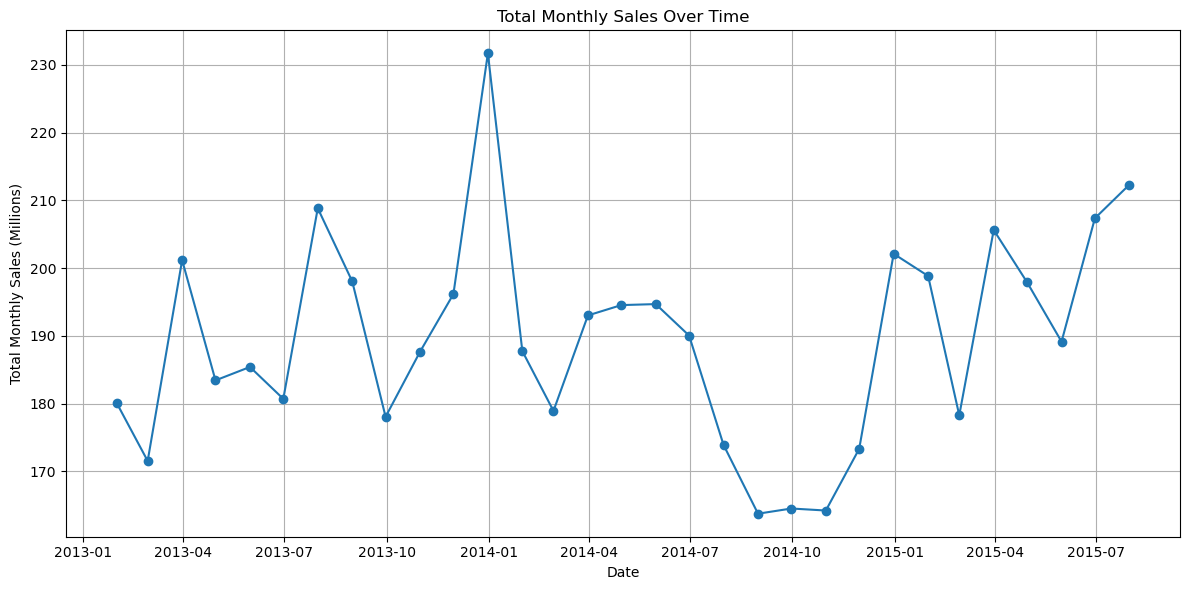

In [24]:
# Group sales by month
monthly_sales = train_store.groupby(pd.Grouper(key='Date', freq='ME'))['Sales'].sum().reset_index()
monthly_sales['Sales'] = monthly_sales['Sales'] / 1000000

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o')
plt.title("Total Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Monthly Sales (Millions)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Q2: Average Sales Across Different Store Types

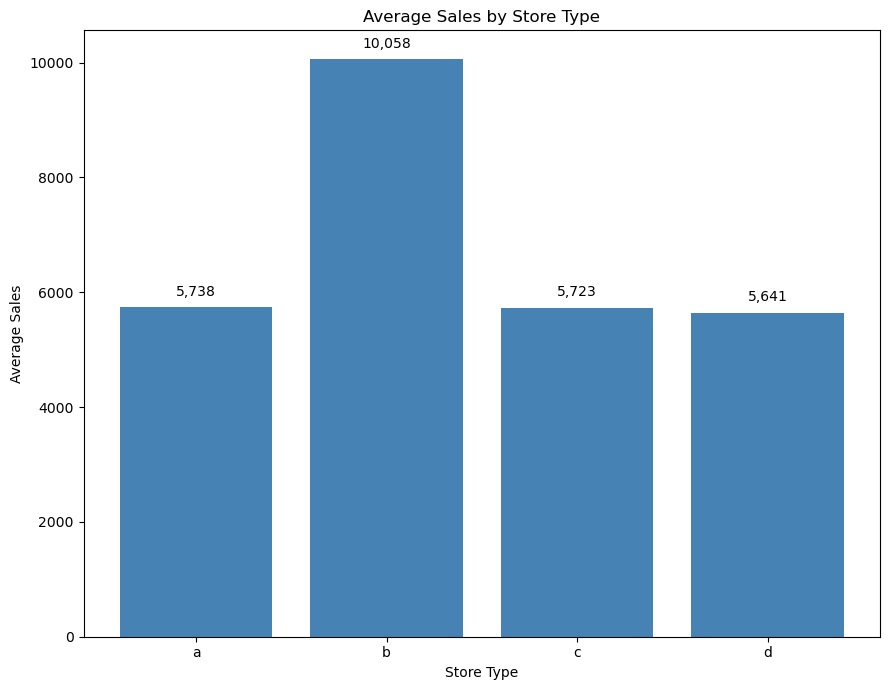

In [26]:
# Calculate average sales per store type
avg_sales_by_type = train_store.groupby('StoreType')['Sales'].mean().sort_index()

# Plot bar chart
plt.figure(figsize=(9, 7))

bars = plt.bar(avg_sales_by_type.index, avg_sales_by_type.values, color='steelblue')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 150, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=10)

# Axis labels and title
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()

# Q3: Promotions vs Average Sales by Store Type

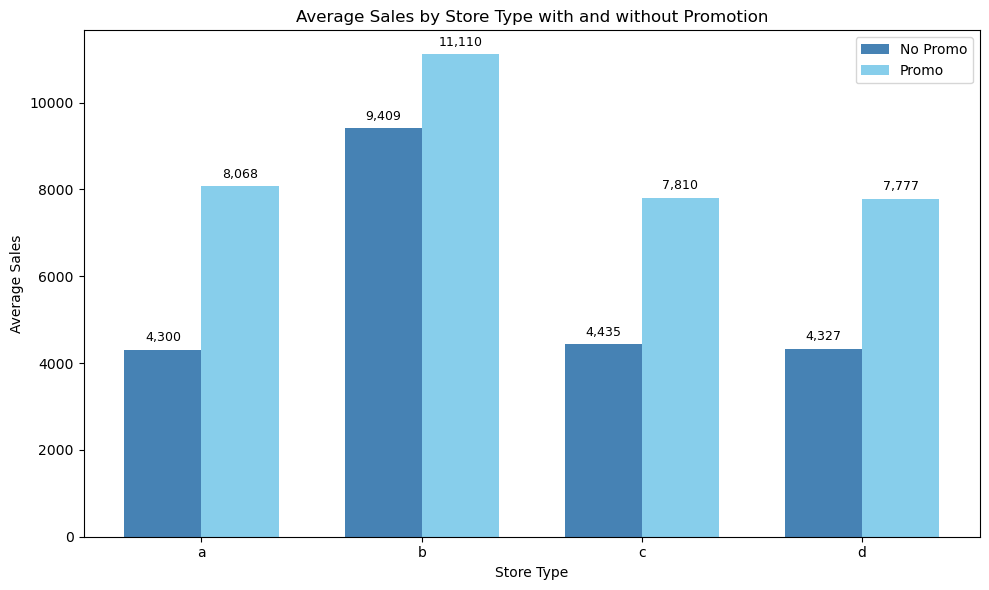

In [28]:
# Group by StoreType and Promo, then calculate average sales
promo_sales = train_store.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack()

# Define bar positions
store_types = promo_sales.index
bar_width = 0.35
x = np.arange(len(store_types))

# Plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width/2, promo_sales[0], width=bar_width, label='No Promo', color='steelblue')
bars2 = plt.bar(x + bar_width/2, promo_sales[1], width=bar_width, label='Promo', color='skyblue')

# Annotate each bar with the exact value
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2,
                 height + 200,
                 f"{height:,.0f}",
                 ha='center',
                 fontsize=9)

# Labels and title
plt.title("Average Sales by Store Type with and without Promotion")
plt.xlabel("Store Type")
plt.ylabel("Average Sales")
plt.xticks(x, store_types)
plt.legend()
plt.tight_layout()
plt.show()

# Q4: Sales Distribution by Assortment Type

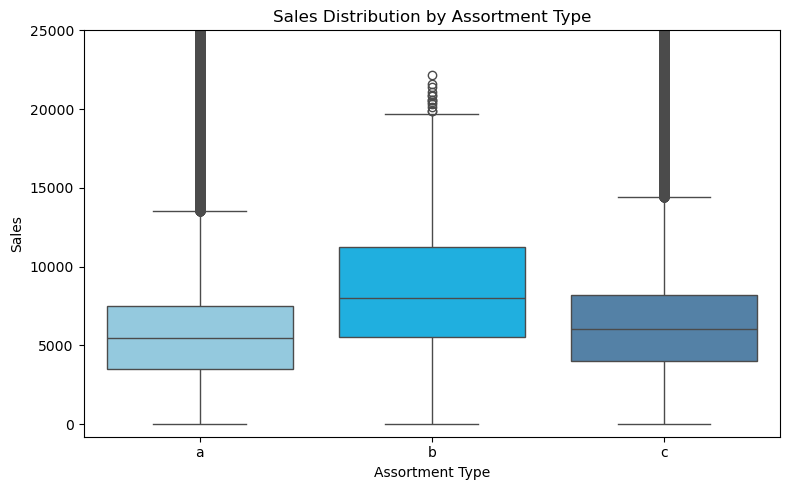

In [124]:
# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_store, x='Assortment', y='Sales', hue='Assortment', palette={'a': 'skyblue', 'b': 'deepskyblue', 'c': 'steelblue'}, order=['a', 'b', 'c'])

plt.title("Sales Distribution by Assortment Type")
plt.xlabel("Assortment Type")
plt.ylabel("Sales")
# y-axis limit to remove outliers
plt.ylim(-800, 25000)
plt.tight_layout()
plt.show()

# Q5: Correlation Matrix

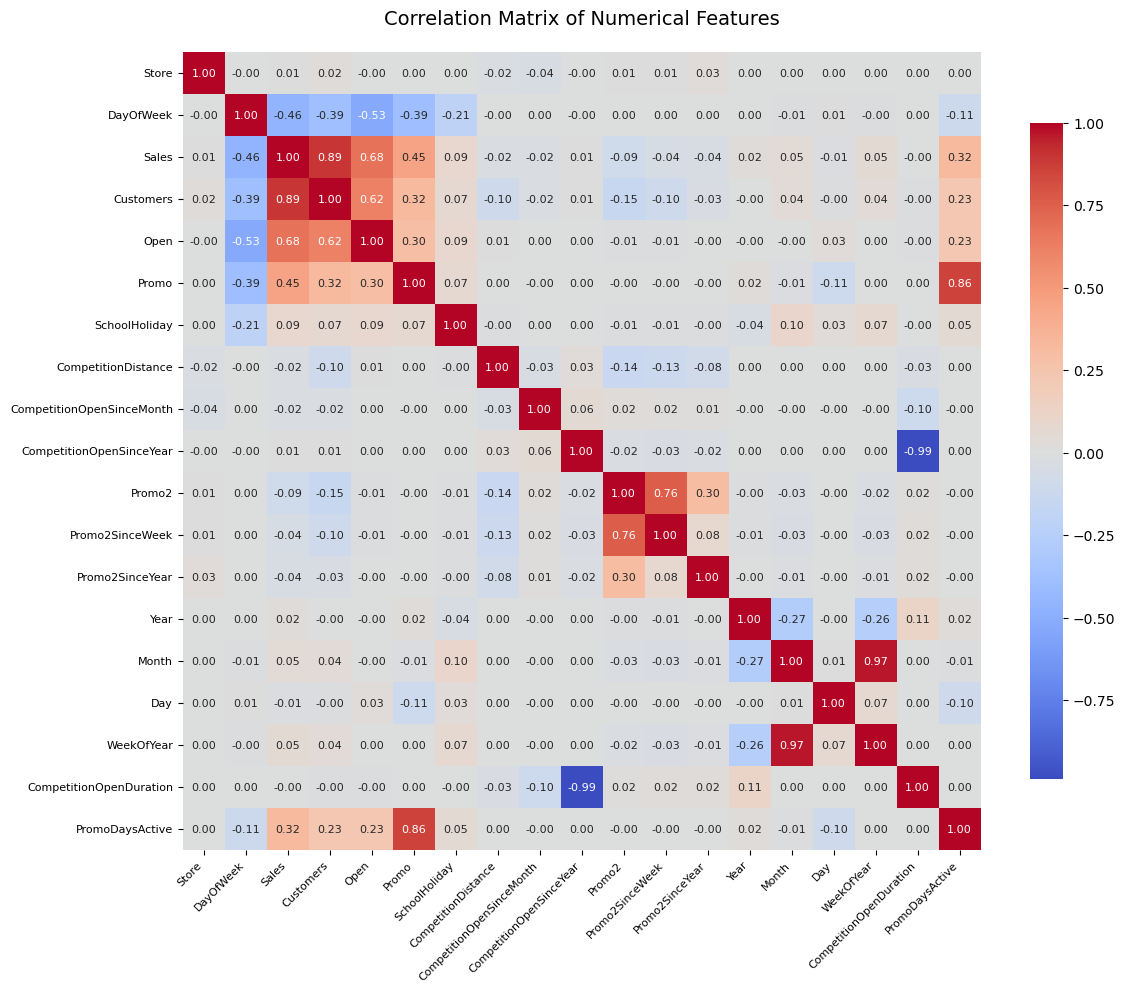